Набор данных содержит 2000 строк данных о домах, представляющих различные характеристики, которые могут повлиять на цены на жилье.

Предметная область - Прогнозирование цен на жилье.

Источник данных - https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset/data

Характер данных - имитационный

В данном наборе данных представлены несколько атрибутов, часть из которых являются числовым типом данных(Area, Bedrooms, Bathrooms, Floors, YearBuilt, Price), часть - категорией (Location, Condition, Garage). Area - размер дома; Bedrooms - количество спальных комнат; Floors - количество этажей; YearBuilt - год постройки дома; Price - цена на дом; Location - место расположения; Condition - условия проживания; Garage - наличие гаража.

Задача анализа - выбор оптимального дома для проживания.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("dataset.csv")


print(df.head())  #Вывод первых строк датасета
info = df.info()  #Получение информации об исследуемом датасете
print(info)
print("-----------------------------------------------")
df.drop('Id', axis = 1, inplace = True)  #Удаление столбца "Id", т к этот столбец не сильно нужен

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Locat

Далее будет определены среднее и СКО значений каждого атрибута. Будут построены гистограммы распределения значений и выявлены выбросы с пропущенными значениями.

СКО значений
Area : 1295.1467987162173
Bedrooms : 1.424606086344799
Bathrooms : 1.1089899365367024
Floors : 0.8091879525618704
YearBuilt : 35.92669547458905
Price : 276428.84571913956
-----------------------------------------------
Среднее значений
Area : 2833.0
Bedrooms : 3.0
Bathrooms : 3.0
Floors : 2.0
YearBuilt : 1961.0
Price : 539254.0


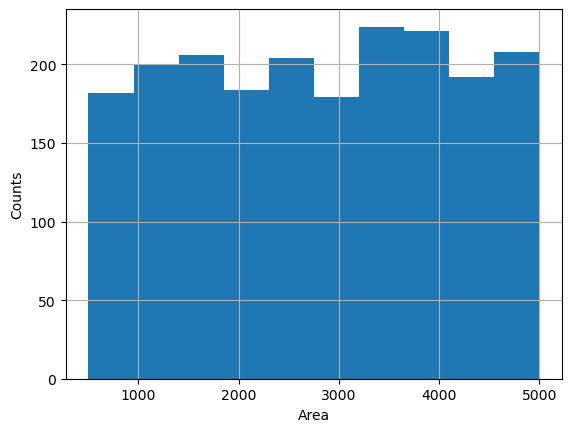

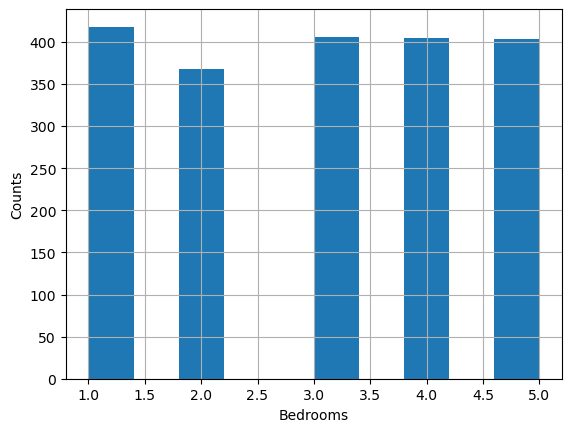

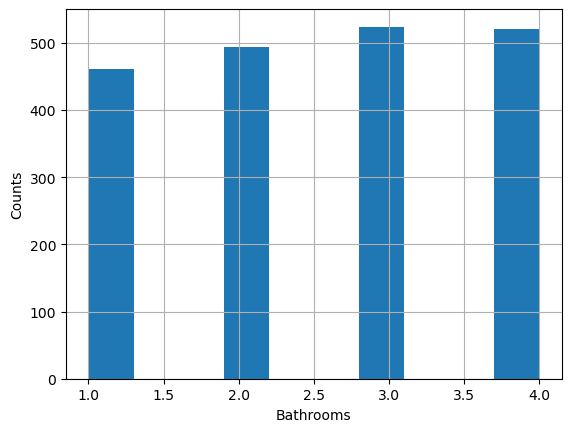

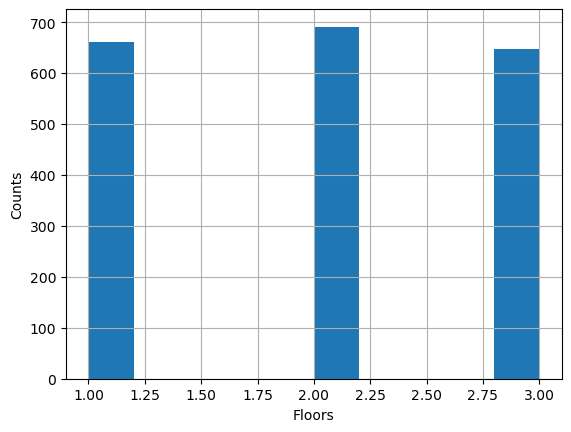

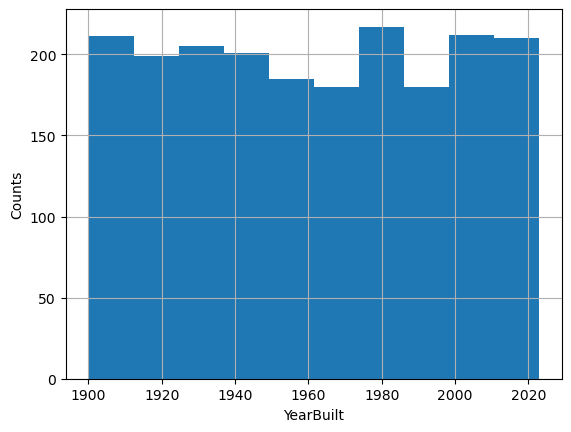

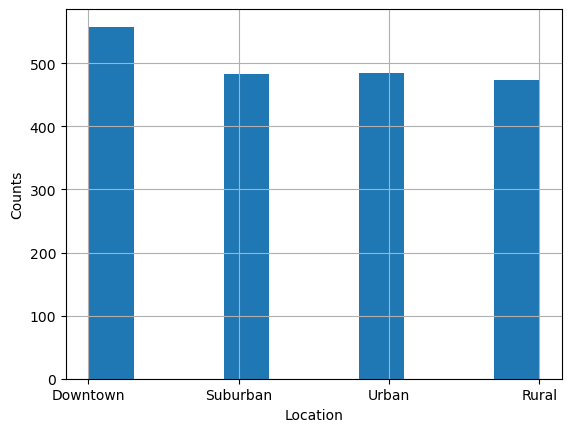

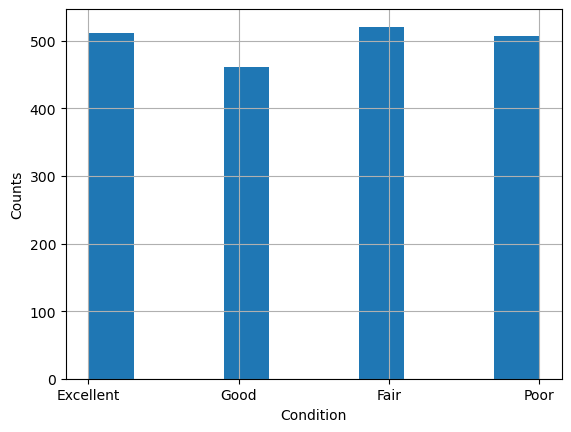

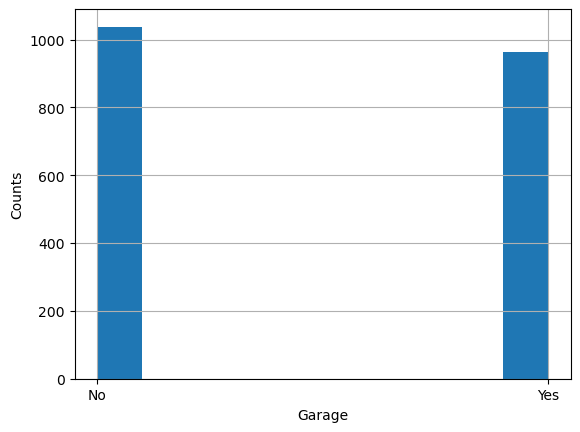

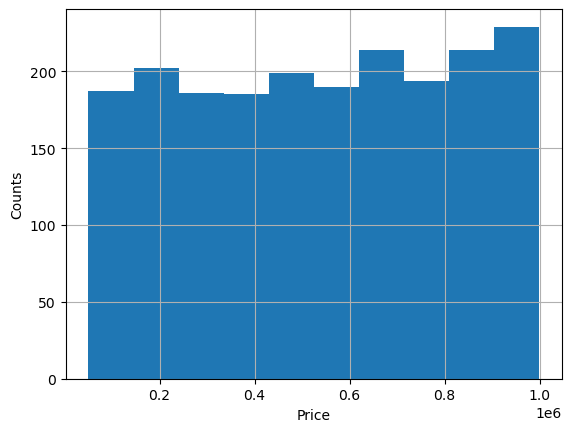

-----------------------------------------------
Проверка на наличие пропущенных значений
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [41]:
describe = df.describe()
print("СКО значений")
for column in describe.columns:
    print(f'{column} : {describe[column]['std']}')
print("-----------------------------------------------")

print("Среднее значений")
for column in describe.columns:
    print(f'{column} : {describe[column]['50%']}')

for col in df.columns:
    df[col].hist(bins=10)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()
print("-----------------------------------------------")
print("Проверка на наличие пропущенных значений")
print(df.isnull().sum())  #Проверка на наличие пропущенных значений

Судя по гистограммам, выбросов нет.

Пропущенные значения тоже отсутствуют - обрабатывать пропущенные значения не придется.

Далее будет определены корреляции между параметрами, будет построена матрица графиков рассеивания.

Корреляция Area c Bedrooms: 0.047523355825547495
Корреляция Area c Bathrooms: 0.021880777481174733
Корреляция Area c Floors: 0.017749386960536375
Корреляция Area c YearBuilt: -0.011608500109402852
Корреляция Area c Price: 0.0015421203243641927
Корреляция Bedrooms c Bathrooms: -0.011990338374818357
Корреляция Bedrooms c Floors: 0.01043462424056444
Корреляция Bedrooms c YearBuilt: -0.014124713589371887
Корреляция Bedrooms c Price: -0.0034705031681084744
Корреляция Bathrooms c Floors: 0.029089420810129576
Корреляция Bathrooms c YearBuilt: -0.0008391001312785704
Корреляция Bathrooms c Price: -0.01573737219261604
Корреляция Floors c YearBuilt: -0.006473536855894371
Корреляция Floors c Price: 0.05589025968921384
Корреляция YearBuilt c Price: 0.004845163834697278
-----------------------------------------------
Данные, не имеющие корреляцию:
Location Condition Garage 

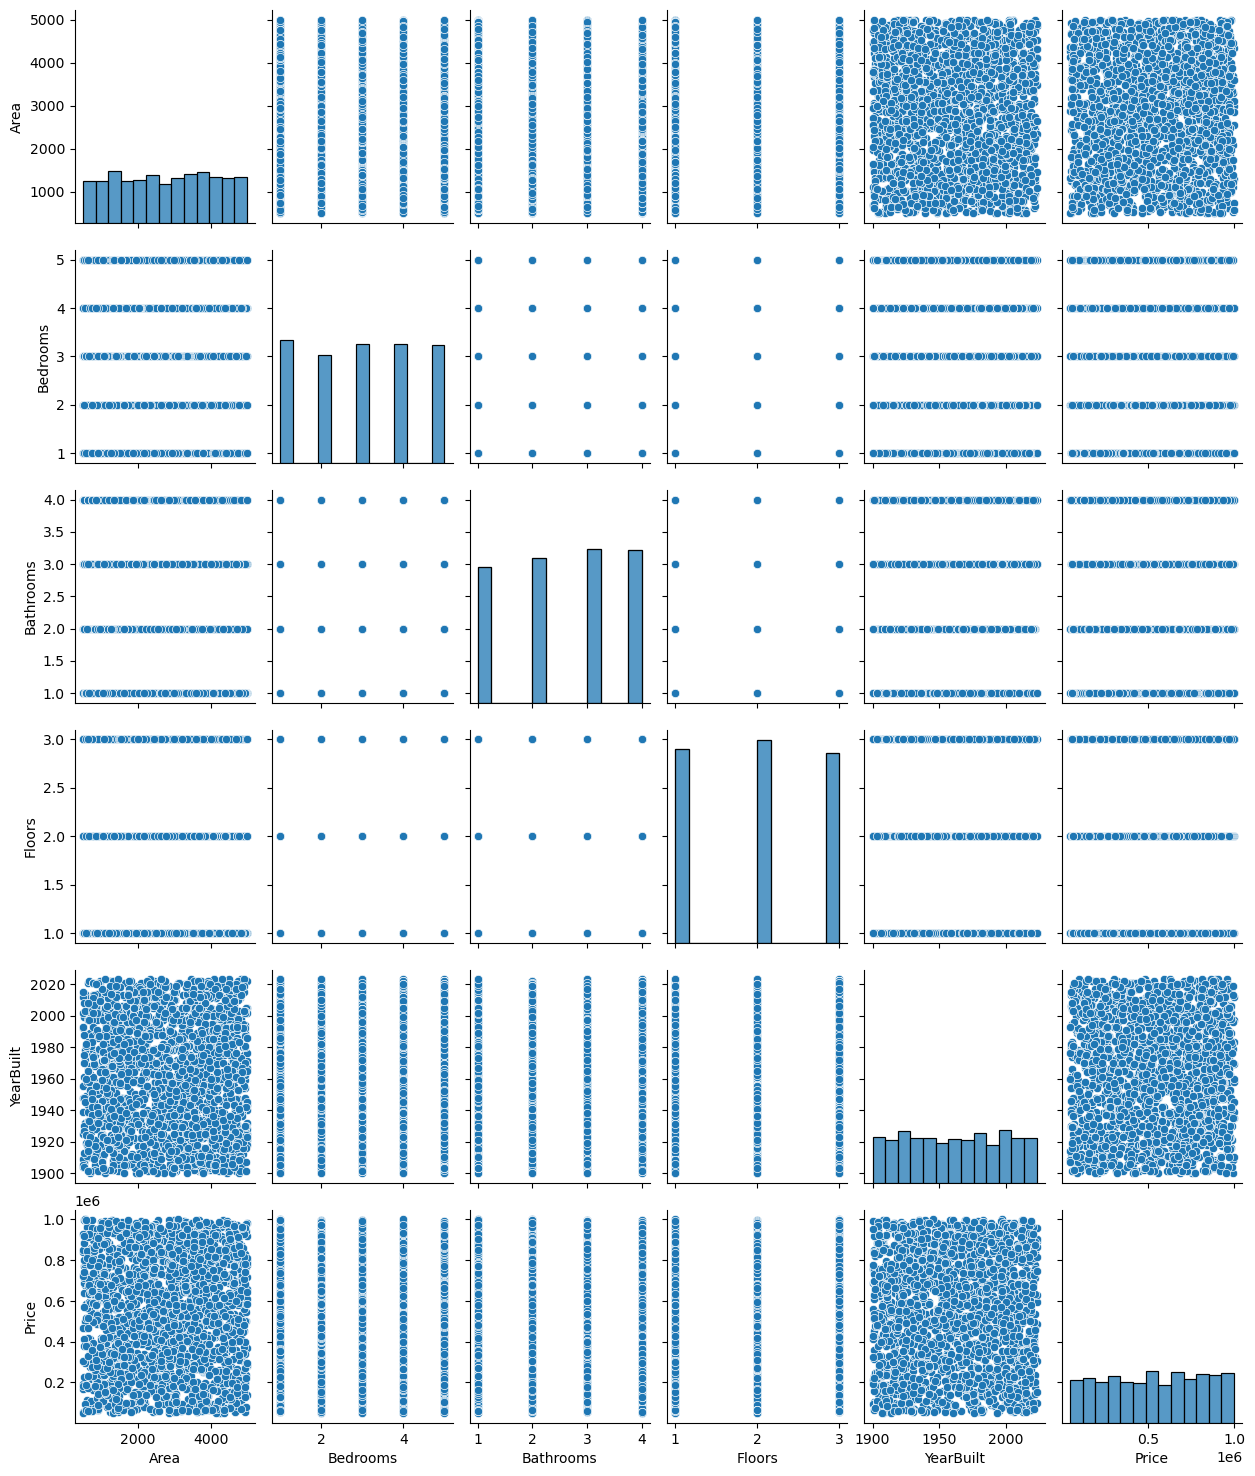

In [44]:
columns = df.columns

for i in range(columns.size):
    for j in range(i+1, columns.size):
        if(df.dtypes[columns[i]] == 'int64') and (df.dtypes[columns[j]] == 'int64'):
            correlation = df[columns[i]].corr(df[columns[j]])
            print(f"Корреляция {columns[i]} c {columns[j]}: {correlation}")
print("-----------------------------------------------")
print("Данные, не имеющие корреляцию:")
for i in df.columns:
    if(df.dtypes[i] != 'int64'):
        print(i, end =" ")

sns.pairplot(data=df, aspect=.85)

Исходя из данных о корреляции, можно сказать, что высококоррелированных атрибутов в датасете нет. Большинство атрибутов(Area, Bedrooms, Bathrooms, Floors, YearBuilt, Price) имеют очень слабую корреляцию. Атрибуты 'Location', 'Condition', 'Garage' не имеют корреляцию, так как относятся к категориальным данным.